## Basins of Attraction
![Z^3 -1 = 0 basins of attraction](fractal.png)

Let's build a program which uses the Newton-Rhapson method to find the basins of attraction for the $z^3-1=0$ function in the complex plane. This ends up producing a fractal like the one above, but you can modify it to produce all manner of fractals. Here's how:

1. Brief explaination of complex numbers and "roots of unity"
2. Introduction to Newton-Rhapson root finding method
3. Create functions for our particular case, $z^3-1=0$
4. Implement the code
5. Render the image



# Roots of Unity

Look at $z^2 = 1$, what 


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\FabricatorGeneral\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    return importlib.import_module(mname)
  File "C:\Users\FabricatorGeneral\Anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 978, in _gcd_import
  File "<frozen importlib._bootstrap>", line 961, in _find_and_load
  File "<frozen importlib._bootstrap>", line 950, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 648, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 560, in module_from_spec
  File "<frozen importlib._bootstrap_external>", line 922, in create_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\FabricatorGeneral\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\FabricatorGeneral\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 21, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\FabricatorGeneral\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    return importlib.import_module('_pywrap_tensorflow_internal')
  File "C:\Users\FabricatorGeneral\Anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
g = lambda x, y: x**3 - 3*x*y**2 - 1
h = lambda x, y: 3*x**2 * y - y**3
gx = lambda x, y: 3*x**2 - 3*y**2
gy = lambda x, y: -6*x*y
hx = lambda x, y: 6*x*y
hy = lambda x, y: 3*x**2 - 3*y**2

# render a PIXELS x PIXELS grid in the defined square
PIXELS = 400
minX = -1
maxX = 1
minY = -1
maxY = 1
points = np.array(np.meshgrid(np.linspace(minX, maxX, PIXELS),
    np.linspace(minY, maxY, PIXELS)))
colors = np.zeros((PIXELS, PIXELS))

In [3]:
def newtonIteration(point, g, h, gx, gy, hx, hy):
    x = point[0]
    y = point[1]
    nextX = x - (g(x,y)*hy(x,y) - h(x,y)*gy(x,y)) / (gx(x,y)*hy(x,y) - gy(x,y)*hx(x,y))
    nextY = y - (h(x,y)*gx(x,y) - g(x,y)*hx(x,y)) / (gx(x,y)*hy(x,y) - gy(x,y)*hx(x,y))
    return (nextX, nextY)

def delta(i, j):
    return (i[0] - j[0])**2 + (i[1]-j[1])**2

def complexNewton(initial, epsilon, maxIterations, g, h, gx, gy, hx, hy):
    current = initial
    prev = (np.inf, np.inf)
    iterations = 0
    while delta(prev, current) > epsilon:
        prev = current
        current = newtonIteration(current, g, h, gx, gy, hx, hy)
        iterations = iterations + 1
        if iterations > maxIterations:
            return (np.nan, np.nan)
    return current

In [4]:
for x in range(PIXELS):
    for y in range(PIXELS):
        zeroFound = complexNewton(points[:, x, y], 0.0001, 10, g, h, gx, gy, hx, hy)
        colors[x,y] = np.sum(zeroFound)    

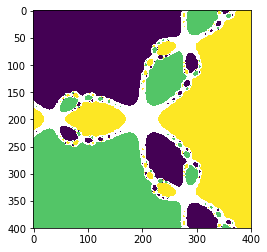

In [5]:
plt.imshow(colors)
